# <center>L2 Computational Physics</center>
---
## Week 4: Differential Equations II

In this notebook, you will write a program to study the trajectory of a spherical, iron cannonball in the presence of gravity and drag forces. 

In [1]:
import numpy
from matplotlib import pyplot as plt

In [2]:
# Define all constants to be used in the simulation
r_cb = 0.15  # Radius of cannonball in m
rho_iron = 7874  # Density of iron in kg/m^3
g = 9.81  # Acceleration due to gravity in m/s^2
kappa = 0.47  # Drag coefficient of a sphere
rho_air = 1.23  # Density of air in kg/m^3
v0 = 125.00  # Initial speed in m/s

From this information, calculate the following two variables:

In [3]:
def get_area(r):
    ''' 
    This function returns the cross section area of a sphere of radius r. The returned 
    value is in the squared units of the unit of the radius argument.
    '''
    return numpy.pi*r**2

def get_mass(r):
    ''' 
    This function returns the mass of an iron sphere of radius r. The radius 
    should be given in meter and the return value is in kg.
    '''
    return (4.0/3)*numpy.pi*r**3*rho_iron

area_cb = get_area(r_cb)
mass_cb = get_mass(r_cb)

In [4]:
# these tests are worth one mark
assert numpy.isclose(area_cb, 0.07068583470577035)
assert numpy.isclose(mass_cb, 111.31605249464711)

## The Differential Equations

Create a function `f` which calculates the right-hand side of the differential equation

$$ \frac{d}{dt}\left(\begin{array}{c}x\\y\\v_x \\v_y \end{array}\right) = f(x, y, v_x, v_y, t)$$

such that the differential equation represents the cannonball's motion as it moves through the air. 

- *Your function should accept two arguments:*
    - `r` *- a numpy array representing the cannonball's state, $(x, y, v_{x}, v_{y})$.*
    - `t` *- Time * 
    
- *The drag force experienced by the cannonball is given by $$\vec{F}_{\textrm{d}} = - \frac{1}{2} C_{\textrm{d}} \rho |\vec{v}|^{2} A \widehat{v}~,$$ where $\widehat{v}$ is a unit vector pointing in the direction of the cannonball's instantaneous velocity.*

In [12]:
def f(r, t):
    '''Implements differential equation for cannonball from state vector r and time t'''
    
    # Unpack array of the state
    x, y, vx, vy = r
    
    # these variables should updated in your code to be the derivatives of 
    # the x, y positions and the derivative of the x, y velocities. 
    dx_dt, dy_dt, dvx_dt, dvy_dt = 0, 0, 0, 0
    
    v2 = vx**2 + vy**2
    a = numpy.arctan(vy/vx) #theta
    b = 0.78539816339
    
    dvx_dt = -(kappa * rho_air * v2 * area_cb * numpy.cos(a))/(2*mass_cb)
    dvy_dt = -g - (kappa * rho_air * v2 * area_cb * numpy.sin(a))/(2*mass_cb)
    dx_dt = v0*numpy.cos(b) + dvx_dt*t
    dy_dt = v0*numpy.sin(b) + dvy_dt*t
    
    return numpy.array([dx_dt, dy_dt, dvx_dt, dvy_dt])
    

Check your result:

In [13]:
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
assert len(f(r_test, 0))== 4

In [14]:
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
assert numpy.isclose(f(r_test, 0), [ 88.38834765,  88.38834765,  -2.0279283 , -11.8379283 ]).all()

## Solving the Differential Equations

Create the function `solve_euler(state_initial, t1, n_panels)` which solves the differential equations using Euler's method.

- `state_initial` *is a numpy array containing the initial conditions $(x_{0}, y_{0}, v_{x0}, v_{y0})$*
- *When working with a numpy array, you can use the same commands as those used for single variables - for instance,* `state += f(state, t)`.
- *This function should record all state values at each timepoint in the variable `history` and return it. This will be similar to last week, only this time you will have to populate a 2D array.* 


In [15]:
def solve_euler(state_initial, t1, n_steps):
    '''Solves ODE using Euler's method from state_initial to end time t1 using n_panels panels'''
    # Define array for trajectory history
    history = numpy.empty((n_steps+1,4))  # Number of columns is equal to number of variables to solve for (4)
    history[0] = state_initial
    h = state_initial
    dt = t1/n_steps
    t = 0
    # you should now populate the history array
    for i in range(int(n_steps)):
        h += dt*f(h,t)
        t += dt
        history[i+1] = h
    return history
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
solve_euler(r_test, 25.0, 10)

array([[   0.        ,    0.        ,   88.38834765,   88.38834765],
       [ 220.97086912,  220.97086912,   83.3185269 ,   58.7935269 ],
       [ 432.19503445,  373.75149912,   79.41984538,   31.51743125],
       [ 637.59644044,  465.91869235,   76.30595276,    5.75669607],
       [ 838.4718438 ,  501.43601344,   73.62655732,  -18.97044366],
       [1033.75567204,  483.77534443,   71.05785323,  -42.83359748],
       [1220.91008676,  418.56823588,   68.35253688,  -65.72783569],
       [1397.26739595,  314.56452787,   65.37829955,  -87.3928075 ],
       [1560.93908662,  182.94114134,   62.10406078, -107.54105068],
       [1711.13040428,   35.97577255,   58.56508321, -125.93786257],
       [1848.12098068, -114.27534288,   54.83262575, -142.43661744]])

Test your solution:

In [16]:
# this test is worth 4 marks
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
assert numpy.isclose(solve_euler(r_test, 25.0, 10), numpy.array(
    [[   0.        ,    0.        ,   88.38834765,   88.38834765],
     [ 220.97086912,  220.97086912,   83.3185269 ,   58.7935269 ],
     [ 429.26718637,  367.95468637,   79.41984538,   31.51743125],
     [ 627.81679983,  446.7482645 ,   76.30595276,    5.75669607],
     [ 818.58168171,  461.14000469,   73.62655732,  -18.97044366],
     [1002.64807501,  413.71389553,   71.05785323,  -42.83359748],
     [1180.2927081 ,  306.62990184,   68.35253688,  -65.72783569],
     [1351.1740503 ,  142.31031262,   65.37829955,  -87.3928075 ],
     [1514.61979917,  -76.17170612,   62.10406078, -107.54105068],
     [1669.87995113, -345.02433282,   58.56508321, -125.93786257],
     [1816.29265915, -659.86898925,   54.83262575, -142.43661744]])).all()

AssertionError: 

## Finding the range

To find the range of the projectile we will look for the $x$ coordinate when the trajectory crosses the $y=0$ line. In most cases that point will not be one of the steps but will be between two steps. We will use a linear approximation to determine this point given the last point with a positive $y$ value and the first point with a negative $y$ value. Implement the function `find_zero_linear` that takes as argument the two values of $x$ `x1` and `x2` and the heights `y1` and `y2` and returns the value of $x$ at which the line between $(x_1,y_1)$ and $x_2,y_2$ crosses the $y=0$ line.  

In [17]:
def find_zero_linear(x1, x2, y1, y2):
    if y1*y2 > 0:
        print("I expect y1 and y2 to have opposite signs!")
    # YOUR CODE HERE
    m = (y2-y1)/(x2-x1)
    c = y1 - m*x1
    return -c/m

In [18]:
# these tests are worth 2 marks
assert numpy.isclose(find_zero_linear(-1,1,3,-3),0.0)
assert numpy.isclose(find_zero_linear(-1,1,1,-3), -0.5)

Given the function above we can define a function to determine the range. (Don't modify it!)

In [19]:
def find_range(history):
    all_xs = history[:,0]
    all_ys = history[:,1]
    negatives = numpy.argwhere(all_ys<0)
    if len(negatives) == 0 :
        print ("The projectile did not touch down! Returning the last known location")
        return all_xs[-1]
    (index,) = negatives[0]
    y1, y2 = all_ys[index-1], all_ys[index]
    x1, x2 = all_xs[index -1], all_xs[index]
    return find_zero_linear(x1,x2,y1,y2)

In [20]:
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
h = solve_euler(r_test, 25.0, 10000)
assert numpy.isclose(find_range(h),1306.2541)

AssertionError: 

## Plotting task

Create a plot to show the trajectories for different values of the initial angle. Use the same velocity $v0=125\rm{m/s}$ for all angles. The plot should have axis labels and a title. [4 marks]


[[ 0.00000000e+00  0.00000000e+00  9.96194698e+02  8.71557427e+01]
 [ 2.12132034e+02  2.12132034e+02  9.41340099e+02  7.94135872e+01]
 [ 4.09574023e+02  4.22141883e+02  8.92373279e+02  7.23396351e+01]
 ...
 [ 1.98436235e+05  2.05342919e+05  1.59533943e-03 -2.31185568e+02]
 [ 1.98648361e+05  2.05555051e+05  1.57503070e-03 -2.31185568e+02]
 [ 1.98860487e+05  2.05767183e+05  1.55498051e-03 -2.31185568e+02]]
[[ 0.00000000e+00  0.00000000e+00  9.84807753e+02  1.73648178e+02]
 [ 2.12132034e+02  2.12132034e+02  9.30580166e+02  1.61143391e+02]
 [ 4.09745851e+02  4.20867130e+02  8.82186107e+02  1.49820261e+02]
 ...
 [ 1.98379910e+05  2.04332793e+05  1.65675327e-03 -2.31185568e+02]
 [ 1.98592036e+05  2.04544925e+05  1.63566274e-03 -2.31185568e+02]
 [ 1.98804162e+05  2.04757057e+05  1.61484070e-03 -2.31185568e+02]]
[[ 0.00000000e+00  0.00000000e+00  9.65925826e+02  2.58819045e+02]
 [ 2.12132034e+02  2.12132034e+02  9.12737956e+02  2.41624398e+02]
 [ 4.10027994e+02  4.19612526e+02  8.65284373e+02 

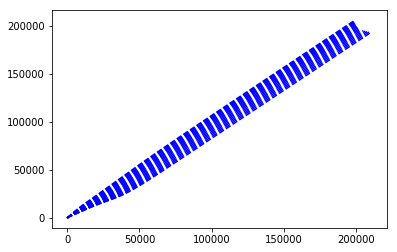

In [31]:
n_steps = 1000
thetas = range(5, 90, 5) # the angles in degrees

for theta in thetas:
    vx0 = v0*numpy.cos(numpy.deg2rad(theta))
    vy0 = v0*numpy.sin(numpy.deg2rad(theta))
    initial_conditions = [0,0,vx0,vy0]
    values_euler = solve_euler(initial_conditions, 300, n_steps)
    print(values_euler)
    xs_euler, ys_euler = values_euler[:,0], values_euler[:,1]
    plt.plot(xs_euler, ys_euler, color='blue', linestyle='--')

#plt.xlim(0,5000)
#plt.ylim(0,5000);

Create a plot to show the range for different values of the initial velocity. Use the same angle $\theta=60^\circ$ for all velocities. The plot should have axis labels and a title and legend. Produce one curve with and one curve without the effect of air resistance. [5 marks]


The projectile did not touch down! Returning the last known location
The projectile did not touch down! Returning the last known location
The projectile did not touch down! Returning the last known location
The projectile did not touch down! Returning the last known location
The projectile did not touch down! Returning the last known location
The projectile did not touch down! Returning the last known location
The projectile did not touch down! Returning the last known location
The projectile did not touch down! Returning the last known location
The projectile did not touch down! Returning the last known location
The projectile did not touch down! Returning the last known location
The projectile did not touch down! Returning the last known location
The projectile did not touch down! Returning the last known location
The projectile did not touch down! Returning the last known location
The projectile did not touch down! Returning the last known location
The projectile did not touch down!

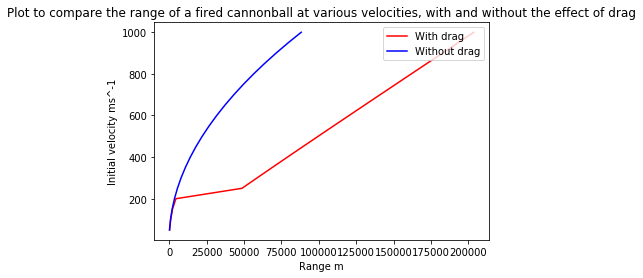

In [22]:
n_steps = 1000
max_time = 300
v0s = numpy.linspace(50, 1000, 20)

ranges = []
ranges_noresistance = []
theta = numpy.deg2rad(60)

# Your code here
for v0 in v0s:
    s = 2*v0**2*numpy.cos(theta)*numpy.sin(theta)/g
    ranges_noresistance.append(s)
    
    vx0 = v0*numpy.cos(theta)
    vy0 = v0*numpy.sin(theta)
    s0 = (0,0,vx0,vy0)
    h = solve_euler(s0,max_time,n_steps)
    ranges.append(find_range(h))

plt.plot(ranges,v0s,color = "red", label = "With drag")
plt.plot(ranges_noresistance,v0s,color = "blue", label = "Without drag")

plt.ylabel("Initial velocity ms^-1")
plt.xlabel("Range m")
plt.title("Plot to compare the range of a fired cannonball at various velocities, with and without the effect of drag")
plt.legend(loc="upper right")

    
